In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Primer on practical probability and statistics

#### The question "how likely is it to happen by chance?" is the essence of probability and statistical methods. The answer to this question makes it easier to predict future events and provide assertions when making crucial decisions.


# Exercise 1:

### if we were to choose random values between zero and one, how likely is it to have a value above 0.5?

In [2]:
np.random.seed(2022)
def sample_from_zero_one_line(n):
    zero_one_line = np.linspace(0, 1, 10_000)
    n_samples = np.random.choice(zero_one_line, size=n)
    return n_samples

for N in [5, 30, 80, 200, 1000]:
    percentage = np.mean(sample_from_zero_one_line(N) > 0.5)
    print(f"from {N} samples we have {percentage} above 0.5")

from 5 samples we have 0.2 above 0.5
from 30 samples we have 0.6 above 0.5
from 80 samples we have 0.5625 above 0.5
from 200 samples we have 0.51 above 0.5
from 1000 samples we have 0.497 above 0.5


# Normal Distribution (Gaussian Distribution)

#### in many times, we end up with data that looks normally distributed. However, few people can link that shape into insights. What is so special about the mean and standard deviation of a normal distribution?


# Exercise 2:

### with a normal distribution $N(0, 1)$, how likely is it to have a value above 0?

from 5 samples we have 0.4 above 0.5
from 30 samples we have 0.5333333333333333 above 0.5
from 80 samples we have 0.4625 above 0.5
from 200 samples we have 0.545 above 0.5
from 1000 samples we have 0.498 above 0.5


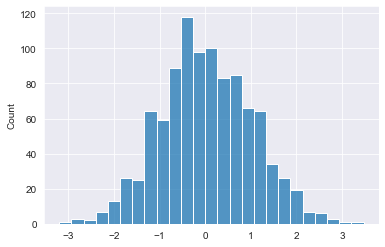

In [3]:
np.random.seed(2022)

mean = 0
standard_deviation = 1

for N in [5, 30, 80, 200, 1000]:
    samples = np.random.normal(mean, standard_deviation, N)
    percentage = np.mean(samples > 0)
    print(f"from {N} samples we have {percentage} above 0.5")

sns.histplot(samples);

# Exercise 3:

### The average height for females in Saudi is 154.3 c.m. with a standard deviation of 11.2 c.m.
### How likely is it to see a Saudi female with a height of 177?

from 50 samples we have 0.04 above 177
from 500 samples we have 0.028 above 177
from 5000 samples we have 0.023 above 177


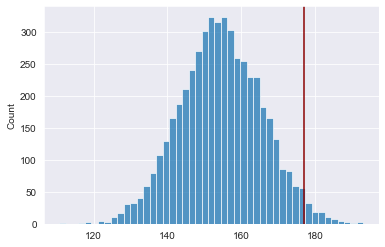

In [4]:
np.random.seed(2022)

mean = 154.3
standard_deviation = 11.2

for N in [50, 500, 5000]:
    samples = np.random.normal(mean, standard_deviation, N)
    percentage = np.mean(samples > 177)
    print(f"from {N} samples we have {percentage} above 177")

sns.histplot(samples);
plt.axvline(177, color="darkred");

### many mathematicians and statisticians have studied the properties of the normal distribution and provided forumals for us to use. Based on these formulas we have the following rule of thumbs


* #### 68% (more than half of the population) is within 1 standard deviation of the mean.
* #### 95% (the majority of the population) is within 2 standard deviation of the mean.
* #### 99.7% (almost all the population) is within 3 standard deviation of the mean.
* 
* #### 16% is above or below 1 standard deviation of the mean.
* #### 2.5% is above or below 2 standard deviation of the mean.
* #### 0.3% is above or below 3 standard deviation of the mean.


# Exercise 4:

### besides calculating these values on the fly, what are the potential applications of this?

# Data Description

#### from the previous module, we found a vocal feature that is highly important in identifying the gender of the person. In this section, we would like to quantify how certain we are about this feature being distinctive. 

In [5]:
gender_vocal_dataset = pd.read_csv("../data/gender_vocal_feature.csv")
gender_vocal_dataset.head()

,gender,vocal_feature
0,female,-223912.5578
1,female,-209716.7812
2,male,-205001.4849
3,male,-274200.2426
4,male,-186774.6239


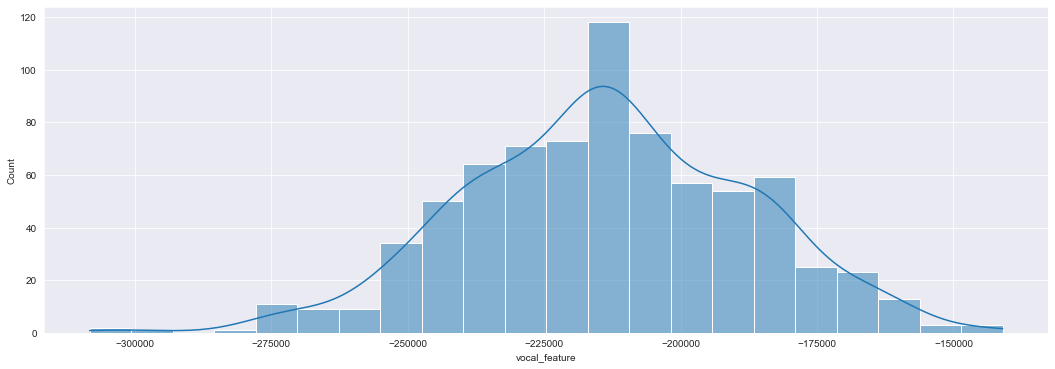

In [6]:
plt.figure(figsize=(18, 6))
sns.histplot(data=gender_vocal_dataset, x="vocal_feature", kde=True);

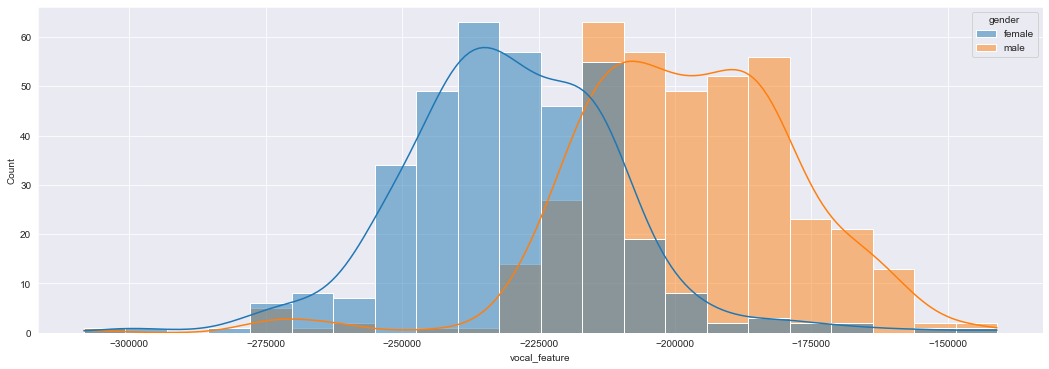

In [7]:
plt.figure(figsize=(18, 6))
sns.histplot(data=gender_vocal_dataset, x="vocal_feature", hue="gender", kde=True);

In [8]:
avg_vocal_value = (
    gender_vocal_dataset
    .groupby("gender")
    ["vocal_feature"]
    .mean()
    .to_dict()
)
observed_diff = abs(avg_vocal_value["male"] - avg_vocal_value["female"])
print(
    f"average vocal values: {avg_vocal_value}",
    f"observed difference: {observed_diff}",
    sep="\n",
)

average vocal values: {'female': -230000.5987920767, 'male': -198220.83908128212}
observed difference: 31779.759710794577


### it looks like that males have a higher value than females (on average)

# Exercise 5:

### How sure are we about this difference?

#### to help us answer this question, there is a known statistical trick called permutation test, which we are going to use. 

an interactive visualization of the trick can be found here: https://www.jwilber.me/permutationtest/#:~:text=The%20Permutation%20Test&text=Statistical%20tests%2C%20also%20known%20as,new%20treatment%20options%20for%20cancer.

In [9]:
vocal_values = gender_vocal_dataset["vocal_feature"].values
is_male = (gender_vocal_dataset["gender"] == "male").values

In [10]:
N = 10_000
simulated_differences = np.zeros(N)
for i in range(N):
    np.random.shuffle(is_male)
    is_female = ~ is_male
    simulated_differences[i] = abs(vocal_values[is_male].mean() - vocal_values[is_female].mean())

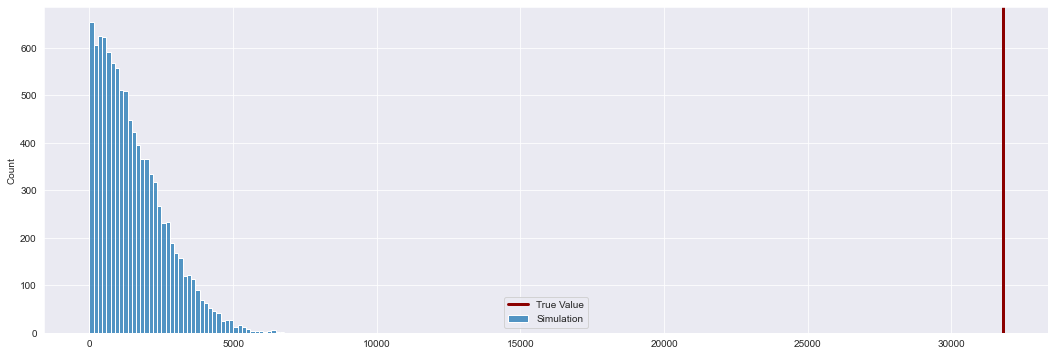

In [11]:
plt.figure(figsize=(18, 6))
sns.histplot(simulated_differences, label="Simulation")
plt.axvline(observed_diff, color="darkred", lw=3, label="True Value")
plt.legend();

In [12]:
p_value = np.mean(simulated_differences > observed_diff)
print(f"Probability of observing such difference or higher by 'random chance' is {p_value}")

Probability of observing such difference or higher by 'random chance' is 0.0
